In [1]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [2]:
import pandas as pd
from langchain_community.document_loaders.telegram import text_to_docs


In [3]:
df = pd.read_csv('tweets_dec_19_25.csv')

In [4]:
df['text'] = df['text'].fillna('').astype(str)
df_new = df.groupby("thread_number")["text"].apply(" ".join).reset_index().rename(columns={"tweet": "combined_tweet"})

In [6]:
df_new['text']

0      I'm kinda puzzled out that I haven't seen an E...
1      Every single active investment fund category u...
2         Underperformed S&P too\n\nEvery. Single. Time.
3      As we wrap up 2024, we're sharing an update on...
4      Introducing Meta Video Seal: a state-of-the ar...
                             ...                        
803                                                     
804    some of y'all have never managed a large team ...
805    As most of you know I am very critical of anyo...
806    Stanford's compact 47-minute course on the ess...
807    【Anychatで使える！GoogleのGemini 2.0 Flash Thinking！...
Name: text, Length: 808, dtype: object

In [7]:
tweets =  df_new['text'].to_list()
tweets = [i for i in tweets if len(i)>20]

In [9]:

tweets = text_to_docs(str(tweets))

In [13]:
from langchain_openai import ChatOpenAI
api_key = 'sk-114521115729428b99606c747e4c1955'
llm = ChatOpenAI(model="deepseek-chat",api_key=api_key, openai_api_base='https://api.deepseek.com',temperature=0)

In [11]:
prompt_template = """Your task is to generate a comprehensive and detailed weekly AI-focused newsletter based on the last 7 days of tweets curated from a list of Twitter accounts.

### Inputs:
- **Tweets List:**  
  {context}

- **Focus Areas:**  
  * New Model Updates: Announcements about significant AI/ML models and advancements, including technical details, release highlights, and potential use cases.  
  * Industry Buzz: Analysis of notable events, discussions, or trends in the AI industry, highlighting their implications and key stakeholders.  
  * Product Launches: Detailed descriptions of new AI tools, APIs, or products, focusing on features, applications, and market impact.  
  * Research Highlights: Summaries of key insights, groundbreaking papers, or innovative findings shared by the community, with explanations of their significance.  
  * Community Contributions: Showcases of notable discussions, open-source contributions, or creative applications of AI, with a focus on their uniqueness and value.  

### Task:
Organize the tweets into relevant sections. Each section should:  
- Begin with a clear, engaging heading.  
- Include detailed bullet-point summaries for each tweet, providing additional context where possible.  
- Explain the relevance or impact of the tweet's content.  
- Include links to any referenced blog posts, papers, tutorials, or external resources mentioned in the tweets.  

### Example Structure:
**New Model Updates**  
- [Tweet summary: Provide an in-depth explanation of the model update, its features, and its potential impact on the industry].  
  *Link:* [Insert URL from the tweet].  

**Industry Buzz**  
- [Tweet summary: Analyze the event, trend, or discussion topic, including why it’s significant and who it involves].  
  *Link:* [Insert URL from the tweet].  

**Product Launches**  
- [Tweet summary: Offer a detailed overview of the product/tool, its key features, and its potential applications].  
  *Link:* [Insert URL from the tweet].  

**Research Highlights**  
- [Tweet summary: Summarize the findings, explain their relevance, and describe the possible implications].  
  *Link:* [Insert URL from the tweet].  

**Community Contributions**  
- [Tweet summary: Highlight the creative or community-driven initiative, explaining its value and impact].  
  *Link:* [Insert URL from the tweet].  
"""


In [10]:
prompt_template_v2 = """Your task is to generate a comprehensive and accurate weekly AI-focused newsletter based on the last 7 days of tweets curated from a list of Twitter accounts.

### Inputs:
- **Tweets List:**  
  {context}

### Focus Areas:  
Organize the tweets into the following sections:  
  * **New Model Updates:** Announcements about significant AI/ML models and advancements, including technical details, release highlights, and potential use cases.  
  * **Industry Buzz:** Analysis of notable events, discussions, or trends in the AI industry, highlighting their implications and key stakeholders.  
  * **Product Launches:** Descriptions of new AI tools, APIs, or products, focusing on features, applications, and market impact.  
  * **Research Highlights:** Summaries of key insights, groundbreaking papers, or innovative findings shared by the community, with explanations of their significance.  
  * **Community Contributions:** Showcases of notable discussions, open-source contributions, or creative applications of AI, with a focus on their uniqueness and value.

### Task:  
- Ensure each section includes:  
  1. A clear, engaging heading.  
  2. Bullet-point summaries of relevant tweets, providing context and explaining their significance.  
  3. Links to referenced blog posts, papers, tutorials, or external resources mentioned in the tweets.  

- **Important Notes:**  
  1. If a tweet's content could fit into multiple sections, include it in the most relevant one and avoid redundancy.  
  2. If no tweets are relevant to a section, skip that section entirely.  
  3. Focus on clarity, relevance, and accuracy in your summaries.  
  4. Highlight the most impactful tweets and omit minor or repetitive information.

### Example Structure:  
**New Model Updates**  
- [Tweet summary: Provide an in-depth explanation of the model update, its features, and its potential impact on the industry].  
  *Link:* [Insert URL from the tweet].

**Industry Buzz**  
- [Tweet summary: Analyze the event, trend, or discussion topic, including why it’s significant and who it involves].  
  *Link:* [Insert URL from the tweet].

**Product Launches**  
- [Tweet summary: Offer a detailed overview of the product/tool, its key features, and its potential applications].  
  *Link:* [Insert URL from the tweet].

**Research Highlights**  
- [Tweet summary: Summarize the findings, explain their relevance, and describe the possible implications].  
  *Link:* [Insert URL from the tweet].

**Community Contributions**  
- [Tweet summary: Highlight the creative or community-driven initiative, explaining its value and impact].  
  *Link:* [Insert URL from the tweet].
"""


In [12]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system",prompt_template)]
)

# Instantiate chain
chain = create_stuff_documents_chain(llm, prompt)

# Invoke chain
result = chain.invoke({"context": tweets})
print(result)

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=3cc39be9-205f-466b-ae30-fdb87ef01447; trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=3d5636c2-f274-480b-bd5d-1cef7e2e6390; trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=ebd51670-b85e-4a22-92ce-d38583bef3a5; trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=3e9ddc89-7dab-4c0d-abd9-d0b3f722ab1a; trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=241a9575-0bfb-415e-affe-04c7d70445ff; trace=3cc39be9-205f-466b-ae30-fdb87ef01447,id=d05a86a8-2f25-483a-a272-af820ca8d2e9


### **New Model Updates**  
- **Meta's Llama Model Hits 650M Downloads:** Meta announced that Llama has been downloaded over 650 million times, doubling in just three months. This highlights the model's widespread adoption and its impact globally.  
  *Link:* [https://go.fb.me/nf5b34](https://go.fb.me/nf5b34)  

- **Meta Video Seal: Neural Video Watermarking Framework:** Meta introduced Meta Video Seal, a state-of-the-art framework for neural video watermarking. The model is available under a permissive license, alongside research papers and training code.  
  *Link:* [https://go.fb.me/1ihqor](https://go.fb.me/1ihqor)  

- **Google's Gemini 2.0 Flash Thinking:** Google released Gemini 2.0 Flash Thinking, an experimental model that shows its thought process while solving complex problems at high speeds. It’s now available in Google AI Studio.  
  *Link:* [https://huggingface.co/spaces/akhaliq/anychat](https://huggingface.co/spaces/akhaliq/anychat)  

- **OpenAI's o3 Model Achieves Super

In [15]:
#v2 result
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system",prompt_template_v2)]
)

# Instantiate chain
chain = create_stuff_documents_chain(llm, prompt)

# Invoke chain
result = chain.invoke({"context": tweets})


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=a0e0dcff-18bd-4d59-a244-4280ce3b346a; trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=54fea1af-6b2e-4f6c-9ea9-f723b101fb4d; trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=5be43041-558c-4e00-85dd-3753871cd29c; trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=77cb60f8-7dc8-45df-a09c-aaa62da413cd; trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=e4d0e2e7-aed6-4259-a51c-50ad988eb072; trace=a0e0dcff-18bd-4d59-a244-4280ce3b346a,id=9d52d7f7-5e26-4aae-a663-0ebd007c472c


In [17]:
print(result)

### New Model Updates  
- **Meta's Llama Model Hits 650M Downloads:** Meta announced that Llama has been downloaded over 650 million times, doubling in just three months. This highlights the model's widespread adoption and its impact on global AI development.  
  *Link:* [Meta's Llama Update](https://go.fb.me/nf5b34)  

- **Google Introduces Gemini 2.0 Flash Thinking:** Google unveiled Gemini 2.0 Flash Thinking, an experimental model that shows its thought process while solving complex problems. It’s designed for faster reasoning and is now available in Google AI Studio.  
  *Link:* [Gemini 2.0 Flash Thinking](https://go.fb.me/1ihqor)  

- **OpenAI's o3 Model Achieves Superhuman Benchmarks:** OpenAI's o3 model has achieved remarkable results on benchmarks like SWE-Bench (71.7%), Codeforces (2727), and ARC-AGI (87.5%). It’s a significant leap in reasoning and coding capabilities, with plans for early access in 2025.  
  *Link:* [OpenAI o3 Announcement](https://huggingface.co/papers/2412

## MAP REDUCE

In [15]:
from langchain_core.prompts import ChatPromptTemplate
intermediate_prompt = """Your task is to generate a concise summary of the following tweets related to AI from the past 7 days.

### Inputs:
- **Tweets Chunk:**  
  {context}

### Task:
- Extract key points from the tweets.  
- Focus on capturing the main ideas or highlights.  
- Write the summary as simple bullet points.  

### Example:
- [Tweet summary: Explain the main idea briefly].  
- [Tweet summary: Highlight any notable events, product updates, or advancements].  
"""

map_prompt = ChatPromptTemplate.from_messages(
    [("system", intermediate_prompt)]
)

### Reduce

We also define a prompt that takes the document mapping results and reduces them into a single output.

In [16]:
# Also available via the hub: `hub.pull("rlm/reduce-prompt")`
final_prompt = final_prompt = """Your task is to generate a polished, comprehensive, and context-rich AI-focused weekly newsletter based on the intermediate summaries provided.

### Inputs:
- **Intermediate Summaries:**  
  {intermediateSummaries}

### Task:
- Consolidate the bullet points into well-structured and coherent sections:  
  1. **New Model Updates:** Combine and elaborate on announcements about significant AI/ML models, highlighting technical details, use cases, and industry impact.  
  2. **Industry Buzz:** Summarize and analyze notable events, discussions, or trends, explaining their implications and relevance to the AI field.  
  3. **Product Launches:** Detail new AI tools, APIs, or products, including features, potential applications, and market impact.  
  4. **Research Highlights:** Provide context for groundbreaking papers, insights, or innovations, discussing their importance and future directions.  
  5. **Community Contributions:** Highlight creative or community-driven initiatives, focusing on their uniqueness, practical value, and potential influence.  

- Ensure the final summary:  
  - Eliminates redundancies while preserving key information.  
  - Highlights the most impactful and relevant points across all summaries.  
  - Writes each section with clear and engaging headings.  
  - Includes detailed bullet-point summaries for each key point.  
  - References any mentioned blog posts, papers, or external resources with links.  

### Example Output:
**New Model Updates**  
- [Detailed and consolidated explanation of model updates, including features, significance, and potential impact].  
  *Link:* [Insert URL].  

**Industry Buzz**  
- [Detailed analysis of industry events or trends, explaining their relevance and key stakeholders].  
  *Link:* [Insert URL].  

**Product Launches**  
- [Comprehensive overview of product/tool, its features, and market significance].  
  *Link:* [Insert URL].  

**Research Highlights**  
- [Summary of research findings with context and future implications].  
  *Link:* [Insert URL].  

**Community Contributions**  
- [Description of community-driven or creative initiatives, including their value and influence].  
  *Link:* [Insert URL].  
"""

reduce_prompt = ChatPromptTemplate([("human", final_prompt)])

### Orchestration via LangGraph

Below we implement a simple application that maps the summarization step on a list of documents, then reduces them using the above prompts.

Map-reduce flows are particularly useful when texts are long compared to the context window of a LLM. For long texts, we need a mechanism that ensures that the context to be summarized in the reduce step does not exceed a model's context window size. Here we implement a recursive "collapsing" of the summaries: the inputs are partitioned based on a token limit, and summaries are generated of the partitions. This step is repeated until the total length of the summaries is within a desired limit, allowing for the summarization of arbitrary-length text.

First we chunk the blog post into smaller "sub documents" to be mapped:

In [17]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=10000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(tweets)
print(f"Generated {len(split_docs)} documents.")

Generated 244 documents.


Next, we define our graph. Note that we define an artificially low maximum token length of 1,000 tokens to illustrate the "collapsing" step.

In [18]:
import operator
from typing import Annotated, List, Literal, TypedDict

from langchain.chains.combine_documents.reduce import (
    acollapse_docs,
    split_list_of_docs,
)
from langchain_core.documents import Document
from langgraph.constants import Send
from langgraph.graph import END, START, StateGraph

token_max = 1000


def length_function(documents: List[Document]) -> int:
    """Get number of tokens for input contents."""
    return sum(llm.get_num_tokens(doc.page_content) for doc in documents)


# This will be the overall state of the main graph.
# It will contain the input document contents, corresponding
# summaries, and a final summary.
class OverallState(TypedDict):
    # Notice here we use the operator.add
    # This is because we want combine all the summaries we generate
    # from individual nodes back into one list - this is essentially
    # the "reduce" part
    contents: List[str]
    summaries: Annotated[list, operator.add]
    collapsed_summaries: List[Document]
    final_summary: str


# This will be the state of the node that we will "map" all
# documents to in order to generate summaries
class SummaryState(TypedDict):
    content: str


# Here we generate a summary, given a document
async def generate_summary(state: SummaryState):
    prompt = map_prompt.invoke(state["content"])
    response = await llm.ainvoke(prompt)
    return {"summaries": [response.content]}


# Here we define the logic to map out over the documents
# We will use this an edge in the graph
def map_summaries(state: OverallState):
    # We will return a list of `Send` objects
    # Each `Send` object consists of the name of a node in the graph
    # as well as the state to send to that node
    return [
        Send("generate_summary", {"content": content}) for content in state["contents"]
    ]


def collect_summaries(state: OverallState):
    return {
        "collapsed_summaries": [Document(summary) for summary in state["summaries"]]
    }


async def _reduce(input: dict) -> str:
    prompt = reduce_prompt.invoke(input)
    response = await llm.ainvoke(prompt)
    return response.content


# Add node to collapse summaries
async def collapse_summaries(state: OverallState):
    doc_lists = split_list_of_docs(
        state["collapsed_summaries"], length_function, token_max
    )
    results = []
    for doc_list in doc_lists:
        results.append(await acollapse_docs(doc_list, _reduce))

    return {"collapsed_summaries": results}


# This represents a conditional edge in the graph that determines
# if we should collapse the summaries or not
def should_collapse(
    state: OverallState,
) -> Literal["collapse_summaries", "generate_final_summary"]:
    num_tokens = length_function(state["collapsed_summaries"])
    if num_tokens > token_max:
        return "collapse_summaries"
    else:
        return "generate_final_summary"


# Here we will generate the final summary
async def generate_final_summary(state: OverallState):
    response = await _reduce(state["collapsed_summaries"])
    return {"final_summary": response}


# Construct the graph
# Nodes:
graph = StateGraph(OverallState)
graph.add_node("generate_summary", generate_summary)  # same as before
graph.add_node("collect_summaries", collect_summaries)
graph.add_node("collapse_summaries", collapse_summaries)
graph.add_node("generate_final_summary", generate_final_summary)

# Edges:
graph.add_conditional_edges(START, map_summaries, ["generate_summary"])
graph.add_edge("generate_summary", "collect_summaries")
graph.add_conditional_edges("collect_summaries", should_collapse)
graph.add_conditional_edges("collapse_summaries", should_collapse)
graph.add_edge("generate_final_summary", END)

app = graph.compile()

LangGraph allows the graph structure to be plotted to help visualize its function:

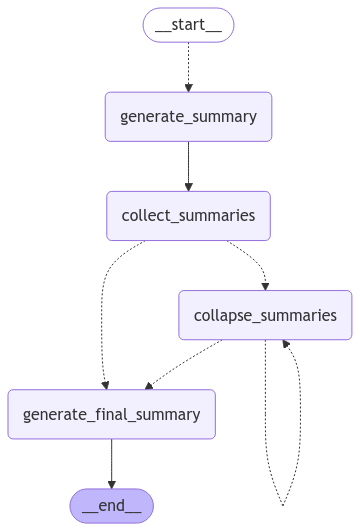

In [19]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

When running the application, we can stream the graph to observe its sequence of steps. Below, we will simply print out the name of the step.

Note that because we have a loop in the graph, it can be helpful to specify a [recursion_limit](https://langchain-ai.github.io/langgraph/reference/errors/#langgraph.errors.GraphRecursionError) on its execution. This will raise a specific error when the specified limit is exceeded.

In [ ]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_docs]},
    {"recursion_limit": 10},
):
    print(list(step.keys()))

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9089956b-f335-44d3-a44d-fa99d2fe4514; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=fc376c45-d22c-40dd-bffe-bfcf7a20a5f7; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=79e8a195-48a0-473a-916b-0a3ece20e481; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=871ff44e-ac13-43f5-ae27-44cd6fb67331; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=077e5e53-6590-442d-8713-89edc7942dce; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=8b5f4d2a-7cfd-4955-bec5-a55dd20ee99c; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=e0b8e77b-725a-4257-96c0-16d587bd4904; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=88f37f68-14cd-48c0-b0e1-ba85f6c666af; trace=221bbf5f-c80e-454e-9b30-258d559227bc,id=221bbf5f-c

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=ea33a5cb-ac58-4bb3-9494-8b9afda35ead; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=ddc647b9-2b2e-47c9-ae89-8c58d62bc026; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=7214f759-7fca-4a98-8e95-bba3f5ef65dd; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=93e58fec-12a4-4c21-a061-23477c307fcb; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4cf33dcb-6403-4b9e-8497-3eb498fc6e15; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=dfb015da-164a-4527-ae29-fbb933988c4b; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=0e460e36-8bbf-4621-b93e-bd8b65dd85f0; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=2e232e86-7036-45cc-8253-f8575c9d2afd; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=5bff83d4-9

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=fd5658da-f03d-4f60-91b0-0da23b58dc01; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=70460e5d-1091-42a4-b831-400853a671ba; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=483f1c06-052a-4db0-8a3a-e485b89c7fee; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=3d9ad0a4-6ec7-414d-8414-05980f87e064; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=27699716-e08a-4025-aa46-f496a838b3a7; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f5f863e6-f0f7-49aa-9fe2-99d2aab7a265; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=a17b9f83-7ddb-4052-9676-0dba5d87c84f; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=0412dd5b-4c1d-4794-95f1-630ed647057a; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4978ff56-c

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=68bc559f-3ce5-4fde-a78a-3cf73e93f1b6,id=68bc559f-3ce5-4fde-a78a-3cf73e93f1b6; trace=3f600b05-ba5c-4336-8251-73a48a65a5c1,id=3f600b05-ba5c-4336-8251-73a48a65a5c1; trace=380054f8-127a-4e5b-9f4f-1e287eb84b39,id=380054f8-127a-4e5b-9f4f-1e287eb84b39; trace=b8aa8d9a-a0b9-4f6b-af22-fe983d02e41a,id=b8aa8d9a-a0b9-4f6b-af22-fe983d02e41a; trace=8ee11002-8182-4d65-9c6d-8ed7f436a630,id=8ee11002-8182-4d65-9c6d-8ed7f436a630; trace=be9b29d6-a827-4801-ae84-3a0b90cd5cfd,id=be9b29d6-a827-4801-ae84-3a0b90cd5cfd; trace=d105d05e-a2a5-4ab6-8825-c6f37069300a,id=d105d05e-a2a5-4ab6-8825-c6f37069300a; trace=38d87cb6-f74e-4cba-b6f0-260802260639,id=38d87cb6-f74e-4cba-b6f0-260802260639; trace=00c1910c-5d6d-4df0-8d84-c7f2e848fb75,id=00c1910c-5

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=59dba36c-7e38-4827-b6c0-989a347c0a37,id=59dba36c-7e38-4827-b6c0-989a347c0a37; trace=0cc93229-205b-4a5d-9040-8b55e2678106,id=0cc93229-205b-4a5d-9040-8b55e2678106; trace=2f0efbbb-bace-48ee-b1de-ec0ad375c5e6,id=2f0efbbb-bace-48ee-b1de-ec0ad375c5e6; trace=4c66dd80-254e-43ba-8f87-bab579ca62e5,id=4c66dd80-254e-43ba-8f87-bab579ca62e5; trace=a7124aff-c74c-4dea-9baa-9c138fa942e1,id=a7124aff-c74c-4dea-9baa-9c138fa942e1; trace=32b79feb-f84b-4768-a22f-6185b02dbbf5,id=32b79feb-f84b-4768-a22f-6185b02dbbf5; trace=4496bdf3-2dd1-4fe3-bd5e-767b0dc255a0,id=4496bdf3-2dd1-4fe3-bd5e-767b0dc255a0; trace=3073962e-4e5c-4d9e-b44b-cb7f67c8a9a7,id=3073962e-4e5c-4d9e-b44b-cb7f67c8a9a7; trace=bb6cd8d8-088c-493d-807a-7ee0888838fb,id=bb6cd8d8-0

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=b6930b44-194a-4c07-8696-c5236b6158c9,id=b6930b44-194a-4c07-8696-c5236b6158c9; trace=0ca61096-1d8f-4f03-a9be-0b1b57dbf631,id=0ca61096-1d8f-4f03-a9be-0b1b57dbf631; trace=2b9e1cf2-4ea3-49f2-b8f2-b59846ebfa15,id=2b9e1cf2-4ea3-49f2-b8f2-b59846ebfa15; trace=5032b16b-d01f-4651-9c89-a742cdeafd95,id=5032b16b-d01f-4651-9c89-a742cdeafd95; trace=5e706219-366c-46f0-9a81-690b586cb3e2,id=5e706219-366c-46f0-9a81-690b586cb3e2; trace=5dd0b643-b817-4ddd-826f-81a19080d932,id=5dd0b643-b817-4ddd-826f-81a19080d932; trace=03675f6f-ef07-4289-83f4-a9e3817e877d,id=03675f6f-ef07-4289-83f4-a9e3817e877d; trace=91da9917-d1ac-439a-9cc9-8898303c3597,id=91da9917-d1ac-439a-9cc9-8898303c3597; trace=d55bedc3-633f-490e-9c6a-23591b13083d,id=d55bedc3-6

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9f2ab709-0d82-4654-a818-a7ea97600392; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=bdaca3a2-0dde-484e-a8d3-9da87e627e06; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=faffd5f3-e5c4-4247-9c70-5fcb954521c7; trace=56e2f95c-23d3-4469-80cd-5b2c2cab390b,id=56e2f95c-23d3-4469-80cd-5b2c2cab390b; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f77157c1-5a63-430b-8dd0-3ddb3c26fdc7; trace=5abd551a-42bc-4d04-9ab6-bca957faed34,id=5abd551a-42bc-4d04-9ab6-bca957faed34; trace=4bd6447d-95c9-4ade-b9c0-3a1ce362ae82,id=4bd6447d-95c9-4ade-b9c0-3a1ce362ae82; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=95e1cafc-d4d5-4c53-a851-ed066ee87722; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=638d5499-9

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=d98b8a9e-1fb5-449c-8958-07c992351e69; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9a6a9253-30f6-44d7-839c-62f70add34ef; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=15070ec3-5036-4e9a-8620-afbddc71d1c8; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f710b942-c967-4a4c-8313-13e8c93b230e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=bc0a907a-a08a-4873-a32b-4ed1fbf04fa5; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=2c27d752-e9d7-4483-9fa8-29d22c4ba789; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=cb095d28-af3b-4abc-ae40-f67f3ef107d7; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=501105be-4545-45e7-ba4b-9019811f674d; trace=ca9a8ab8-13f5-4449-929a-0b4fa153de54,id=ca9a8ab8-1

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=484336f6-f2a6-474a-910b-8ac7cc1f8281; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=ba8474d7-477a-4b5e-985e-60c1fc007de2; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=112f597b-f3e6-4b2b-9e01-2598a190f089; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=aa97f292-4508-451f-91a8-bedde87b2bf6; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=abce86a8-96d5-4503-9a90-3c66291c2893; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=cf156303-c5b5-47ac-8439-9e749f80eedb; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=81b7019c-6f07-4711-8bff-f84f5b793729; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6f440d42-eb9d-439c-a3da-a9ff3881733e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9496eaf0-2

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6fa344cc-0db1-471a-b057-b0ed7c362905; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=42f35104-4349-4cbe-850c-786309707b8b; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6e64bf51-61c7-4e56-b4bf-0949852ef8db; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b145e1c0-68bc-4974-a663-ee76240d9672; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4fa2ce84-96b9-434a-8059-2d8143fef68f; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=7d4b7c85-46cf-4dd3-95b0-8f491dee94eb; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=12ab234a-c5fb-4e5f-ad7b-15c03e18c300; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c8ceeab2-1d9b-43e8-a132-2ac995cdf954; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=93c3293b-9

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_su

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=82074f30-f6de-4872-a258-91b6294e4298; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=d3dd78da-c916-47b2-8656-78027f1488e1; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c1249b8f-91d7-4e98-8e67-70d0a69d5900; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=7ab82c81-96e5-4e7e-a571-b16f94670658; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=17ebd7e5-707b-450b-8f7d-31465c3c1f06; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b501e546-2304-4d17-b760-0c7da855c66c; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=8ceb70e1-58a8-46fe-9182-572c37aa837c; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=960a3a6f-5cc1-4945-bc00-5023fe14b58b; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=41db334c-8

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=50f4ac85-3cf2-4442-85b9-6061fed1034f; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f7cabe33-a24d-430a-8059-0f8eed0ca405; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=81f0def7-193e-4d4b-b5b5-f0bf4a8d8918; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=007d4178-9a20-4b57-bd64-dc6f3f29cdff; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9b153fd1-2434-4d83-a8ee-f70bb7820304; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=a4afa547-4197-43ff-80ec-58c8309b48ab; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=a2a1efc1-9dff-4529-8f28-d51e4130a368; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f03ac6ab-a56d-4304-86c4-e2f404336fed; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=d6247f56-b

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c41c4968-a45f-4f11-a440-f471b0155e85; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=934df300-abb0-4cdc-bffa-e0f54bb21928; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=98c0f16f-6965-4bd1-9d7a-4b93a5740cef; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=388821f6-2883-4caa-acab-b1c2a058ff10; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=77424194-ca5c-4309-a25e-15f3adafc26e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=e6b3f3db-8daa-4349-9a8f-db31e6f4929a; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=997cd6d1-504f-4849-a390-5444c727b782; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=14ec1a26-23a4-4180-a1a7-222a47f30ac5; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9acd1759-5

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=387775b9-75d6-4275-9152-7d7ab488cd1e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4f160096-f0dd-469b-a2b1-9d9f8dc865ec; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=409babe4-ce90-4fe5-a8c2-f38e96dc5826; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=789db513-06d7-4f96-8128-fd7081b0a662; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=33163421-744c-43be-9efd-41c826b91a85; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=1a19b42c-e8be-410e-af5e-7f1f4fef6d9d; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=94db45cf-2f3d-4a59-8894-f84470f15ebe; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=2672759f-7c9c-409a-b928-9519c3fc7a30; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=634f8b91-b

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=8ea9254a-c22f-4abe-937f-f02960041c1e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b078f3e0-c940-4220-91c2-bda82644a503; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=9a8a8aa3-639a-4f02-893f-b4bd0ae802b4; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4bd24b23-c3a8-4d0f-8e1b-bddcb938c69d; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c5bc05bf-4a0c-4577-ac65-9b58bb74c610; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c757da58-ccd0-497b-a7fb-a81cbf1b1018; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6cf3dc70-6f41-4254-9ad3-5c4e4b547684; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6d44cf40-ea25-415e-bfa2-bc2c493e8942; trace=8226090b-caf3-449d-bfdd-6f331eb0a2fc,id=8226090b-c

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f07a372c-9598-4813-ad1d-091c248b6d6d; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=23fab7d2-095d-4ced-88a1-efaefca0a8c5; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=0d40a311-2940-44c4-8947-9b747d369f1f; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=42367b30-37f9-41ec-ad79-0a1b71f308c2; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=67eec978-83e3-4fcd-9d6a-35d2a7813f6a; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=dbc23133-5970-48c7-bea9-ccfb1ca5656e; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=582fb3d2-1cc5-4618-a73c-22814e25bf9a; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b61edc1d-db5b-4120-9e76-e6864cb721a3; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=bccdf877-8

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=8210f31b-1046-43ed-b665-dcc38f78520a; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=c072fab3-30b7-4ca1-8569-61191d646530; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=16ac962d-310a-4262-9692-a66d871385fe; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=fcc7e439-571e-49fb-a1e7-541999b7e261; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b8584d8e-96f5-45ba-99d8-2a066593e905; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=5e4052b6-8d12-4553-9583-fb6a997caec8; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=44d75333-bbd7-4f0f-baa6-6b65caef1d40; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=2385080d-af84-40ec-8dee-debfc0eef924; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=48fc6776-b

['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=76b10012-78a5-4084-9d40-a806565cebbe; trace=40388a14-9f14-44af-8d34-4b5e7f1d925f,id=40388a14-9f14-44af-8d34-4b5e7f1d925f; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=a17b9f83-7ddb-4052-9676-0dba5d87c84f


['generate_summary']
['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=6ccc9cb6-02bf-4202-963d-d09ca0319653; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=0dd60cf6-9288-4f68-8dde-59c9756424ab; trace=09d2bb5b-f4c7-40f6-b08d-8f658a066336,id=09d2bb5b-f4c7-40f6-b08d-8f658a066336
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=bd0503fe-e1cc-4d37-aba7-3d65535fe6f4; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=483f1c06-052a-4db0-8a3a-e485b89c7fee; trace=bcf75bb6-e159-4a95-9286-4bddc93

['generate_summary']


Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=d9872a8f-4a91-45da-835c-063cb98030d4; trace=f080b618-1b29-4be3-9ef8-cce48993fe83,id=f080b618-1b29-4be3-9ef8-cce48993fe83; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b6a1dd1d-21a4-4588-b85c-32baad36bcd7
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=532724bd-6304-43b5-8dcd-2a263440c1a2; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=84acf286-b0a8-4777-82cc-3cfe956be0c8; trace=9089956b-f335-44d3-a44d-fa99d2f

Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=061bb473-d487-4d88-bf98-2adce829bc22; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=b3495861-4872-4ad4-8827-36b5de51a0cc; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=44a529ae-69fe-4be1-9122-5c10585af72b
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"detail":"Invalid token"}')trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=f939cc65-db61-4bd0-8eaf-eb5fe1f8b2f2; trace=9089956b-f335-44d3-a44d-fa99d2fe4514,id=4498f763-9f1f-4f63-82c0-326863fd94a7
Failed to multipart ingest runs: langs

In [ ]:
print(step)